Code to test whether the distribution of moral strategies in the HMTG fMRI study is different from the distribution found in the behavioral replication experiment or not

In [ ]:
import warnings, os, sys, glob, nltools, scipy, matplotlib, sklearn
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import numpy as np
import pandas as pd
from scipy import stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42 

base_dir = '/project/3014018.02/analysis_mri/DataSharingCollection/'
sys.path.append('../Tools/')
import FigureTools

## Load clusters

In [2]:
imgDat = pd.read_csv(os.path.join(base_dir,
    'Results/2.Behavior-ClusterModel/ParticipantClustering.csv'),index_col=0)
print imgDat['ClustName'].value_counts()

IA    24
MO    21
GR     7
GA     5
Name: ClustName, dtype: int64


## Load replication data

In [3]:
repModelFits = pd.read_csv(os.path.join(base_dir,'Data/7.BehavioralReplication'+
                                  '/ModelFits.csv'),
                    header=0,index_col=0)
repModelFits.head()

,sub,model,theta,phi,SSE,AIC
0,1,GR,NaN,NaN,7533.0,349.319963
1,1,GA,356.529191,NaN,756.0,176.595411
2,1,IA,251.378808,NaN,169.0,62.736568
3,1,MP,0.022657,0.000664,130.0,44.796884
4,1,MP_ppSOE,0.067945,0.001722,164.0,62.454115


In [4]:
repClustering = pd.read_csv(os.path.join(base_dir,'Data/7.BehavioralReplication'+
                                  '/ParticipantClustering.csv'),
                    header=0,index_col=0)
repClustering.head()

,sub,baseMult,model,theta,phi,SSE,AIC,BIC,time,clust,ClustName
0,1,4,MP_ppSOE,0.067945,0.001722,164.0,62.454115,67.115581,1094.875217,2,MO
1,2,4,MP_ppSOE,0.496520,0.082632,0.0,-inf,-inf,1588.765513,0,GR
2,3,4,MP_ppSOE,0.029392,0.001509,582.0,158.716020,163.377487,1523.359156,3,IA
3,4,4,MP_ppSOE,0.103066,0.084852,289.0,105.512694,110.174161,1482.317685,3,IA
4,5,4,MP_ppSOE,0.025692,0.065856,106.0,29.285637,33.947104,1641.756111,3,IA


## Similarity approach

In [5]:
simFun = sklearn.metrics.pairwise.cosine_similarity

In [7]:
nChoice = 57
nIter = 10000
fullSet = range(len(np.unique(repClustering['sub'])))
imgCounts = imgDat['ClustName'].value_counts()
groups = imgCounts.index
simsTrue = list()
for i in range(nIter):
    if np.mod(i,100) == 0:
        print i,
    # Bootstrap:
    subSet = np.random.choice(fullSet,size=nChoice,replace=True)
    repDatSample = repClustering.loc[repClustering['sub'].isin(subSet),:].copy().reset_index(drop=True)
    repCounts = [sum(repDatSample.ClustName==group) for group in groups]
    sim = simFun([imgCounts,repCounts])[0,1]
    simsTrue.append(sim)
# plt.hist(simsTrue)

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900


(array([   4.,    8.,   48.,  123.,  305.,  660., 1254., 2086., 2944.,
        2568.]),
 array([0.80620714, 0.825573  , 0.84493885, 0.8643047 , 0.88367056,
        0.90303641, 0.92240226, 0.94176812, 0.96113397, 0.98049982,
        0.99986568]),
 <a list of 10 Patch objects>)

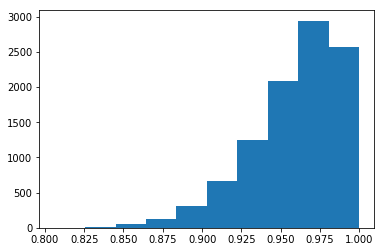

In [8]:
plt.hist(simsTrue)

#### Get null distribution (i.e. random samples with uniform distribution in population)

In [9]:
import sklearn
nChoice = 57
nIter = 10000
imgCounts = imgDat['ClustName'].value_counts()
groups = imgCounts.index
simsNull = list()
for i in range(nIter):
    if np.mod(i,100) == 0:
        print i,
    nums = np.random.random(size=nChoice)
    repCounts = np.random.multinomial(nChoice,pvals= [.25,.25,.25,.25])
    sim = simFun([imgCounts,repCounts])[0,1]
    simsNull.append(sim)

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900


(array([2.000e+00, 1.000e+01, 6.600e+01, 2.350e+02, 6.520e+02, 1.477e+03,
        2.366e+03, 2.874e+03, 1.853e+03, 4.650e+02]),
 array([0.51058303, 0.55848432, 0.60638561, 0.6542869 , 0.70218819,
        0.75008948, 0.79799077, 0.84589206, 0.89379335, 0.94169464,
        0.98959593]),
 <a list of 10 Patch objects>)

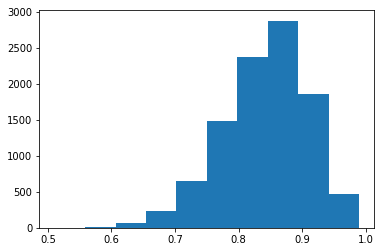

In [10]:
plt.hist(simsNull)

#### Compare distributions

0.0143


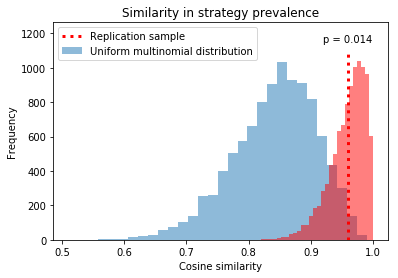

In [11]:
plt.hist(simsNull,alpha=.5,bins=30)
plt.hist(simsTrue,alpha=.5,color='red',bins=30)
plt.plot([np.mean(simsTrue),np.mean(simsTrue)],[plt.ylim()[0],plt.ylim()[1]],
         'r:',lineWidth=3)
plt.legend(labels=['Replication sample','Uniform multinomial distribution',])
plt.title('Similarity in strategy prevalence')
pval = np.mean(simsNull>np.mean(simsTrue))
plt.text(np.mean(simsTrue),plt.ylim()[1],'p = %.3f'%pval,horizontalalignment='center')
plt.ylim([0,plt.ylim()[1]*1.1])
plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
print(pval)
plt.savefig(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ComparePrevalenceReplication.pdf'),
           bbox_inches='tight',transparent=True)

## Plot normalized distributions

In [12]:
imgCounts = pd.DataFrame(imgDat['ClustName'].value_counts()).reset_index()
repCounts = pd.DataFrame(repClustering['ClustName'].value_counts()).reset_index()
both = imgCounts.merge(repCounts,on='index')
both.columns = ['group','img','rep']
both_perc = both.copy()
for i in [1,2]:
    both_perc.iloc[:,i] = (both_perc.iloc[:,i]/sum(both_perc.iloc[:,i])*100)
both_perc = both_perc.set_index('group')
both_perc

,img,rep
group,,
IA,42.105263,30.769231
MO,36.842105,45.192308
GR,12.280702,15.384615
GA,8.771930,8.653846


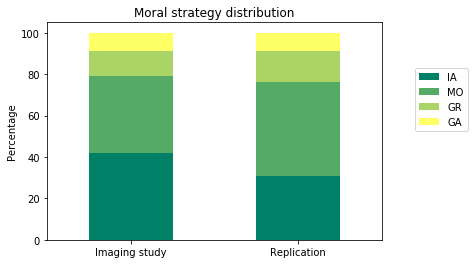

In [13]:
ax = both_perc.T.plot(kind='bar',stacked=True,colormap='summer')
plt.legend(loc=[1.1,.5])
ax.set_xticklabels(['Imaging study','Replication'],rotation=0)
plt.title('Moral strategy distribution')
plt.ylabel('Percentage')
plt.savefig(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ComparePrevalenceReplication_stackBar.pdf'),
           bbox_inches='tight',transparent=True)

#### Distributions and test side-by-side:

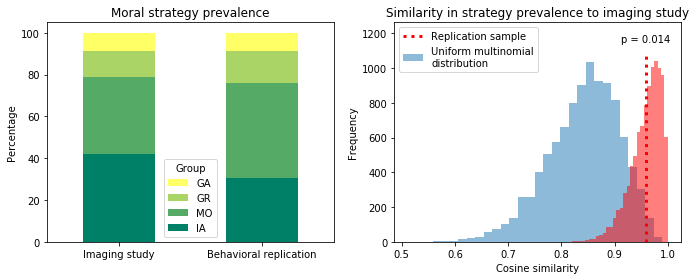

In [14]:
fig, ax = plt.subplots(1,2,figsize=[10,4])

out = both_perc.T.plot(kind='bar',stacked=True,colormap='summer',ax=ax[0])
ax[0].set_xticklabels(['Imaging study','Behavioral replication'],rotation=0)
ax[0].set_title('Moral strategy prevalence')
ax[0].set_ylabel('Percentage')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], title='Group')

ax[1].hist(simsNull,alpha=.5,bins=30)
ax[1].hist(simsTrue,alpha=.5,color='red',bins=30)
ax[1].plot([np.mean(simsTrue),np.mean(simsTrue)],[plt.ylim()[0],plt.ylim()[1]],
         'r:',lineWidth=3)
ax[1].legend(labels=['Replication sample','Uniform multinomial\ndistribution',])
ax[1].set_title('Similarity in strategy prevalence to imaging study')
pval = np.mean(simsNull>np.mean(simsTrue))
ax[1].text(np.mean(simsTrue),plt.ylim()[1],'p = %.3f'%pval,horizontalalignment='center')
ax[1].set_ylim([0,ax[1].get_ylim()[1]*1.1])
ax[1].set_xlabel('Cosine similarity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(os.path.join(base_dir,
     'Results/2.Behavior-ClusterModel/ComparePrevalenceReplication_barsAndTest.pdf'),
           bbox_inches='tight',transparent=True)

In [15]:
np.mean(simsTrue)

0.9589351130085615

#### WIth model fits (supp fig 4)

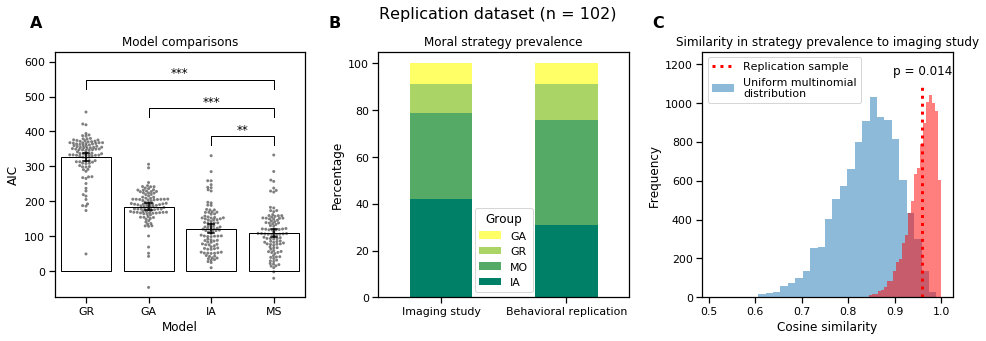

In [19]:
sns.set_context('notebook')

fig, ax = plt.subplots(1,3,figsize=[14,4.5])

metric = 'AIC'
order = ['GR','GA','IA','MP_ppSOE']
sns.barplot(data=repModelFits.loc[repModelFits['SSE']>10],x='model',y=metric,ax=ax[0],
            alpha=1,errwidth=0,zorder=1,order=order,color='w',edgecolor='k',linewidth=1)
sns.swarmplot(data=repModelFits.loc[repModelFits['SSE']>10],x='model',y=metric,ax=ax[0],
              alpha=.5,s=3,zorder=2,order=order,color='k')
sns.barplot(data=repModelFits.loc[repModelFits['SSE']>10],x='model',y=metric,ax=ax[0],
            alpha=0,errwidth=1.5,capsize=.1,errcolor='k',zorder=3,
            order=order)
ax[0].set_xticklabels(['GR','GA','IA','MS'])
ax[0].set_xlabel('Model')
ax[0].set_title('Model comparisons')
FigureTools.add_sig_markers(ax[0],relationships=[[2,3,0.0095],[1,3,0],[0,3,0]],
                            ystart=360,distScale=1)

# #
out = both_perc.T.plot(kind='bar',stacked=True,colormap='summer',ax=ax[1])
ax[1].set_xticklabels(['Imaging study','Behavioral replication'],rotation=0)
ax[1].set_title('Moral strategy prevalence')
ax[1].set_ylabel('Percentage')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1], title='Group')

ax[2].hist(simsNull,alpha=.5,bins=30)
ax[2].hist(simsTrue,alpha=.5,color='red',bins=30)
ax[2].plot([np.mean(simsTrue),np.mean(simsTrue)],[plt.ylim()[0],plt.ylim()[1]],
         'r:',lineWidth=3)
ax[2].legend(labels=['Replication sample','Uniform multinomial\ndistribution',])
ax[2].set_title('Similarity in strategy prevalence to imaging study')
pval = np.mean(simsNull>np.mean(simsTrue))
ax[2].text(np.mean(simsTrue),plt.ylim()[1],'p = %.3f'%pval,horizontalalignment='center')
ax[2].set_ylim([0,ax[2].get_ylim()[1]*1.1])
ax[2].set_xlabel('Cosine similarity')
ax[2].set_ylabel('Frequency')

plt.suptitle('Replication dataset (n = 102)',y = 1.05,fontsize=16);
FigureTools.add_subplot_letter(ax[0],'A',x_shift=1,fontsize=16)
FigureTools.add_subplot_letter(ax[1],'B',x_shift=.9,fontsize=16)
FigureTools.add_subplot_letter(ax[2],'C',x_shift=.9,fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(base_dir,
     'Results/2.Behavior-ClusterModel/AllReplicationResults.pdf'),
           bbox_inches='tight',transparent=True)

## Chi-square test

In [17]:
obs = np.array(both[['img','rep']]).T
obs

array([[24, 21,  7,  5],
       [32, 47, 16,  9]])

In [18]:
stats = ss.chi2_contingency(obs)
print('Chi-square = %.2f, df = %i, p = %.4f'%(stats[0],stats[2],stats[1]))

Chi-square = 2.22, df = 3, p = 0.5286
